In [1]:
import pandas as pd
import numpy as np
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import matplotlib.pyplot as plt
from scipy import stats

sdf = pd.DataFrame.spatial.from_featureclass("Chapter16_17.gdb\DLSF_Data_SE")
sdf 

,OBJECTID,SID,Station,AvgDLSpF,Latitude,Longitude,Elevation,DisttoCoas,SHAPE
0,1,1.0,"Edenton, NC",85.27,36.02,-76.55,10.0,1.252000,"{'x': 1725088.8095999993, 'y': 11341.914599999..."
1,2,2.0,"Hopewell, VA",96.00,37.30,-77.28,40.0,46.268000,"{'x': 1633134.5571000017, 'y': 138958.56949999..."
2,3,3.0,"Tarboro, NC",93.22,35.88,-77.53,35.0,45.256000,"{'x': 1642323.759399999, 'y': -21387.174599999..."
3,4,4.0,"Kinston, NC",91.44,35.20,-77.55,24.0,45.426000,"{'x': 1655253.2974999994, 'y': -96422.66469999..."
4,5,5.0,"Southport, NC",82.85,33.92,-78.02,20.0,3.418000,"{'x': 1640519.1022999994, 'y': -245095.4436999..."
...,...,...,...,...,...,...,...,...,...
71,72,72.0,"Troy, AL",74.41,31.80,-85.97,542.0,103.576073,"{'x': 943843.2164999992, 'y': -587431.12139999..."
72,73,73.0,"Scottsboro, AL",98.02,34.67,-86.05,615.0,298.914000,"{'x': 902859.7817000002, 'y': -269594.04839999..."
73,74,74.0,"De Funiak Springs, FL",71.33,30.72,-86.10,245.0,29.394000,"{'x': 944149.9701999985, 'y': -708227.2242, 'z..."
74,75,75.0,"Talladega, AL",97.83,33.42,-86.13,448.0,212.841000,"{'x': 910110.1387000009, 'y': -409301.58449999..."


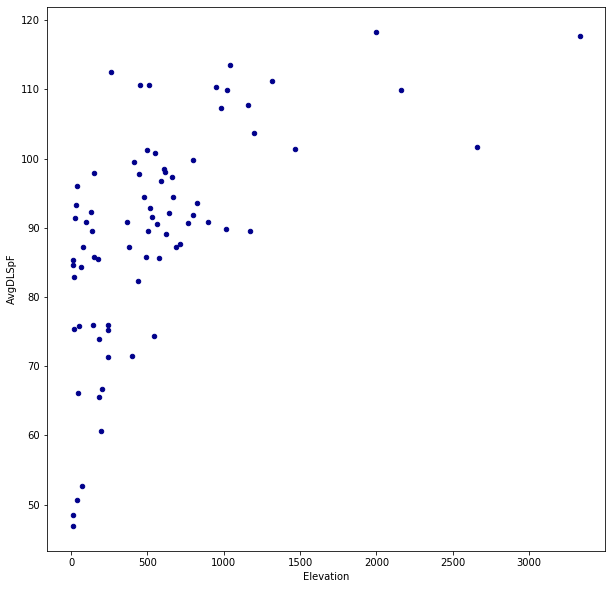

In [7]:
ax1 = sdf.plot.scatter(x="Elevation",y="AvgDLSpF",c='DarkBlue', figsize=(10,10)) 

In [8]:
r, pvalue = stats.pearsonr(sdf["Elevation"], sdf["AvgDLSpF"])
print("r:", r)
print("pvalue:", pvalue)

r: 0.5991347265567446
pvalue: 1.0797980301693878e-08


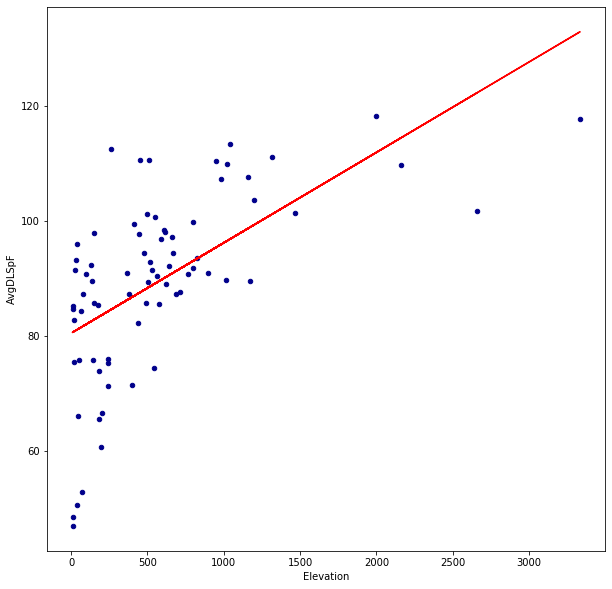

In [9]:
ax1 = sdf.plot.scatter(x="Elevation",y="AvgDLSpF",c='DarkBlue', figsize=(10,10)) 
x = sdf.Elevation
y = sdf.AvgDLSpF

regressStats = stats.linregress(x, y)
m = regressStats.slope
b = regressStats.intercept
plt.plot(x, m * x + b, color="red")

In [10]:
regressStats

LinregressResult(slope=0.015746896932265855, intercept=80.47059354907658, rvalue=0.5991347265567445, pvalue=1.0797980301693904e-08, stderr=0.0024462248713401583)

In [11]:
print("R-squared: %f" % regressStats.rvalue**2)

R-squared: 0.358962
